# Testing confidence intervals
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

### (1) Definition of random number generation and limits

In [2]:
# Parameters of the Poisson distribution

mean = 10
sigma = np.sqrt(mean)

# Considered limits

limlow = np.array(
    [
        mean - sigma,
        mean - 2 * sigma,
        mean - 3 * sigma,
        mean - 4 * sigma,
        mean - 5 * sigma,
    ]
)
limhig = np.array(
    [
        mean + sigma,
        mean + 2 * sigma,
        mean + 3 * sigma,
        mean + 4 * sigma,
        mean + 5 * sigma,
    ]
)

# Number generation procedure


def myrnd(N=1):
    rvec = np.random.poisson(mean, size=(N))

    return rvec

### (2) Generate multiple numbers

In [3]:
Nmc = 100000000

rvec = myrnd(Nmc)

### (3)  Count limit probability

In [4]:
print("\nLower limit probability:")

for ll in limlow:
    nl = np.sum(rvec < ll)
    p = nl / Nmc
    ep = np.sqrt(p * (1 - p) / Nmc)
    print(" P ( x < ", ll, ") = ", p, " +/- ", ep)

print("\nUpper limit probability:")

for ul in limhig:
    nl = np.sum(rvec > ul)
    p = nl / Nmc
    ep = np.sqrt(p * (1 - p) / Nmc)
    print(" P ( x > ", ul, ") = ", p, " +/- ", ep)


Lower limit probability:
 P ( x <  6.83772233983162 ) =  0.13016119  +/-  3.364806898141168e-05
 P ( x <  3.675444679663241 ) =  0.01034873  +/-  1.0120095744303558e-05
 P ( x <  0.5131670194948619 ) =  4.579e-05  +/-  6.766675939920575e-07
 P ( x <  -2.649110640673518 ) =  0.0  +/-  0.0
 P ( x <  -5.811388300841898 ) =  0.0  +/-  0.0

Upper limit probability:
 P ( x >  13.16227766016838 ) =  0.13555705  +/-  3.4231759550934204e-05
 P ( x >  16.32455532033676 ) =  0.02703525  +/-  1.6218614385155564e-05
 P ( x >  19.486832980505138 ) =  0.00345725  +/-  5.869665597321111e-06
 P ( x >  22.64911064067352 ) =  0.00029379  +/-  1.7137785371392069e-06
 P ( x >  25.811388300841898 ) =  1.675e-05  +/-  4.09264210962796e-07


### (4) Plot distribution histogram

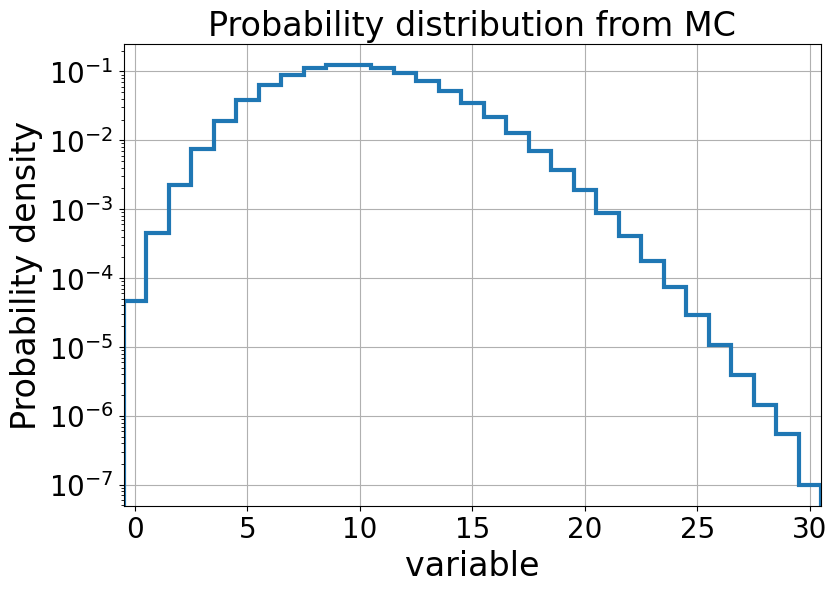

In [5]:
# Range for result histogram

Xmax = 30.5
Nbin = 31

# Plot histogram

plt.figure(figsize=(9, 6))

plt.hist(
    rvec,
    bins=Nbin,
    range=[-0.5, Xmax],
    density=True,
    log=True,
    histtype="step",
    linewidth=3,
)

plt.title("Probability distribution from MC", size=24)
plt.xlabel("variable", size=24)
plt.ylabel("Probability density", size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([-0.5, Xmax])
plt.grid(which="major", axis="both")

fname = "06_interval_2.png"
plt.savefig(fname)

plt.show()